In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import os
import pathlib
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Load datasets from Roboflow
url_augmented_1 = "https://universe.roboflow.com/ds/EE1o2Y0fFE?key=eu38hNWFIb"
path_augmented_1 = tf.keras.utils.get_file('Augmented_Dataset_1.tar', origin=url_augmented_1, extract=True)
path_augmented_1 = pathlib.Path(path_augmented_1).with_suffix('')

url_augmented_2 = "https://universe.roboflow.com/ds/Sp3Y6esHqk?key=TBFoPKVZJo"
path_augmented_2 = tf.keras.utils.get_file('Augmented_Dataset_2.tar', origin=url_augmented_2, extract=True)
path_augmented_2 = pathlib.Path(path_augmented_2).with_suffix('')

url_no_aug = "https://universe.roboflow.com/ds/TAU0NQbANV?key=cXKGqxIg7v"
path_no_aug = tf.keras.utils.get_file('No_Augmentation.tar', origin=url_no_aug, extract=True)
path_no_aug = pathlib.Path(path_no_aug).with_suffix('')


In [26]:
image_count_1 = len(list(path_augmented_1.glob('*/*.tfrecord')))
if image_count_1 == 0:
    path_augmented_1 = str(path_augmented_1) + '\\vehicle_1_photos'
    path_augmented_1 = pathlib.Path(path_augmented_1)
print(f"Vehicle 1 photos TFRecord count: {image_count_1}")

image_count_2 = len(list(path_augmented_2.glob('*/*.tfrecord')))
if image_count_2 == 0:
    path_augmented_2 = str(path_augmented_2) + '\\vehicle_2_photos'
    path_augmented_2 = pathlib.Path(path_augmented_2)
print(f"Vehicle 2 photos TFRecord count: {image_count_2}")

image_count_no = len(list(path_no_aug.glob('*/*.tfrecord')))
if image_count_no == 0:
    path_no_aug = str(path_no_aug) + '\\vehicle_no_photos'
    path_no_aug = pathlib.Path(path_no_aug)
print(f"Vehicle no photos TFRecord count: {image_count_no}")

Vehicle 1 photos TFRecord count: 3
Vehicle 2 photos TFRecord count: 3
Vehicle no photos TFRecord count: 3


In [27]:
import pathlib

base_path = pathlib.Path('*/*.keras/datasets/Augmented_Dataset_1_extracted*/*')

# Initialize your directories
data_dir = pathlib.Path('data_dir')  # Replace with your actual base path
data_dire = pathlib.Path('data_dire')  # Replace with your actual base path
data_dires = pathlib.Path('data_dires')  # Replace with your actual base path

# Function to count TFRecords with fallback path
def count_tfrecords_with_fallback(base_path, fallback_subdir):
    count = len(list(base_path.glob('*/*.tfrecord')))
    if count == 0:
        new_path = base_path / fallback_subdir
        print(f"No TFRecords found in {base_path}, trying {new_path}")
        count = len(list(new_path.glob('*/*.tfrecord')))
        return count, new_path
    return count, base_path

# Count for vehicle 1
image_count_1, data_dir = count_tfrecords_with_fallback(data_dir, 'vehicle_1_photos')
print(f"Vehicle 1 TFRecord count: {image_count_1}")

# Count for vehicle 2
image_count_2, data_dire = count_tfrecords_with_fallback(data_dire, 'vehicle_2_photos')
print(f"Vehicle 2 TFRecord count: {image_count_2}")

# Count for no vehicle
image_count_no, data_dires = count_tfrecords_with_fallback(data_dires, 'vehicle_no_photos')
print(f"No vehicle TFRecord count: {image_count_no}")

No TFRecords found in data_dir, trying data_dir\vehicle_1_photos
Vehicle 1 TFRecord count: 0
No TFRecords found in data_dire, trying data_dire\vehicle_2_photos
Vehicle 2 TFRecord count: 0
No TFRecords found in data_dires, trying data_dires\vehicle_no_photos
No vehicle TFRecord count: 0


In [28]:
import pathlib

base_path = pathlib.Path('*/*.keras/datasets/Augmented_Dataset_1_extracted*/*')

def debug_tfrecord_search(base_path, fallback_subdir):
    print(f"\nSearching in: {base_path}")
    
    # Check directory exists
    if not base_path.exists():
        print(f"❌ Directory doesn't exist: {base_path}")
        return 0, base_path
    
    # Try different patterns
    patterns = [
        '*.tfrecord',        # Current directory
        '*/*.tfrecord',      # One level deep
        '**/*.tfrecord'      # Recursive
    ]
    
    for pattern in patterns:
        files = list(base_path.glob(pattern))
        if files:
            print(f"✔ Found {len(files)} TFRecords with pattern '{pattern}':")
            for f in files[:3]:  # Show first 3 files
                print(f"  → {f.relative_to(base_path)}")
            return len(files), base_path
    
    # Fallback logic
    fallback_path = base_path / fallback_subdir
    print(f"⚠ No TFRecords found in main path, trying fallback: {fallback_path}")
    
    if fallback_path.exists():
        return debug_tfrecord_search(fallback_path, "")
    else:
        print(f"❌ Fallback path doesn't exist: {fallback_path}")
        return 0, base_path


count, _ = debug_tfrecord_search(data_dir, 'vehicle_1_photos')
print(f"\nFinal count: {count}")


Searching in: data_dir\vehicle_1_photos
❌ Directory doesn't exist: data_dir\vehicle_1_photos

Final count: 0


#### Transforming .tfrecord into .jpg

In [ ]:
# Dataset_1_train data

# Path to the TFRecord file
tfrecord_path = os.path.expanduser(r"~\.keras\datasets\Augmented_Dataset_1_extracted\train\damages.tfrecord")

# Output directory for the extracted images
output_dir = "damages_images"
os.makedirs(output_dir, exist_ok=True)

# Feature description for parsing the TFRecord
feature_description = {
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
    'image/filename': tf.io.FixedLenFeature([], tf.string, default_value='image.jpg')
}

# Function to parse a single TFRecord example
def _parse_function(example_proto):
    return tf.io.parse_single_example(example_proto, feature_description)

# Read the TFRecord file
raw_dataset = tf.data.TFRecordDataset(tfrecord_path)

# Parse the dataset
parsed_dataset = raw_dataset.map(_parse_function)

# Extract and save images
for record in parsed_dataset:
    image_data = record['image/encoded'].numpy()
    filename = record['image/filename'].numpy().decode('utf-8')
    output_path = os.path.join(output_dir, filename)
    
    # Decode the image and save it as a .jpg file
    image = Image.open(io.BytesIO(image_data))
    image.save(output_path, format='JPEG')
    print(f"Saved: {output_path}")

Saved: damages_images\Severe-dents--41-_jpg.rf.e79c3aa528c21f8c22fadb83872a8ba9.jpg
Saved: damages_images\slightly-scratch--107-_jpg.rf.d240a4e449b49bf999eece1e475dfa07.jpg
Saved: damages_images\windshield_damage--68-_jpg.rf.19d8678ab5e561df6b18ffc2a2285bcd.jpg
Saved: damages_images\Severe-dents--129-_jpg.rf.6c62360c4ae66c7bcafdef22674e939d.jpg
Saved: damages_images\slightly-scratch--128-_jpg.rf.177364ca8e1a23a70a651f182e4fe366.jpg
Saved: damages_images\windshield_damage--143-_jpg.rf.6a1fc519c96f12955eb6348acefc16ce.jpg
Saved: damages_images\Small-dents--1-_jpeg_jpg.rf.7c39f31e6e3952b2126e6beeed4635ab.jpg
Saved: damages_images\windshield_damage--118-_jpg.rf.d7025a8f59b5c174f38c26f0ef99b9ec.jpg
Saved: damages_images\cracks-and-holes--84-_jpg.rf.f32f7be0552369a1cbd302a9f501ecd1.jpg
Saved: damages_images\Small-dents--137-_jpg.rf.80c0fb883014786f3ca781fe65411ce2.jpg
Saved: damages_images\Severe-dents--107-_jpg.rf.74ac02d9f9d19cfec11591e3c2d1cc81.jpg
Saved: damages_images\Medium-dents--126-

In [30]:
# Expand ~ to full path
base_path = os.path.expanduser("~/.keras/datasets/Augmented_Dataset_1_extracted")

# Find all .tfrecord files recursively
tfrecord_files = glob.glob(os.path.join(base_path, "**", "*.tfrecord"), recursive=True)

print("Found .tfrecord files:")
for f in tfrecord_files:
    print(f)


Found .tfrecord files:
C:\Users\Alexandre/.keras/datasets/Augmented_Dataset_1_extracted\test\Damages.tfrecord
C:\Users\Alexandre/.keras/datasets/Augmented_Dataset_1_extracted\train\Damages.tfrecord
C:\Users\Alexandre/.keras/datasets/Augmented_Dataset_1_extracted\valid\Damages.tfrecord


##### 2.1.1. Create a dataset

Define some parameters for the loader:

In [29]:
batch_size = 32
img_height = 180
img_width = 180

#### Criar um pasta dentro do Damages_images para poder fazer o treino e validação a seguir

In [40]:
import os
import shutil

path_augmented_1 = os.path.expanduser("~\Documents\Visual_Studio_Code\DL\damages_images")
dst_folder = os.path.join(path_augmented_1, "all")
os.makedirs(dst_folder, exist_ok=True)

# Move all jpg files to the new "all" folder
for filename in os.listdir(path_augmented_1):
    if filename.lower().endswith(".jpg"):
        shutil.move(os.path.join(path_augmented_1, filename),
                    os.path.join(dst_folder, filename))


<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Alexandre\AppData\Local\Temp\ipykernel_14696\3696205062.py:4: SyntaxWarning: invalid escape sequence '\D'
  path_augmented_1 = os.path.expanduser("~\Documents\Visual_Studio_Code\DL\damages_images")


#### Criar várias subpastas para todos os dados

Using 80% of the images for training and 20% for validation.

In [39]:
path_augmented_1 = os.path.expanduser("~\Documents\Visual_Studio_Code\DL\damages_images")

train_ds = tf.keras.utils.image_dataset_from_directory(
  path_augmented_1,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Alexandre\AppData\Local\Temp\ipykernel_14696\4014807004.py:1: SyntaxWarning: invalid escape sequence '\D'
  path_augmented_1 = os.path.expanduser("~\Documents\Visual_Studio_Code\DL\damages_images")


Found 2788 files belonging to 1 classes.
Using 2231 files for training.


In [42]:
path_augmented_1 = os.path.expanduser("~\Documents\Visual_Studio_Code\DL\damages_images")

val_ds = tf.keras.utils.image_dataset_from_directory(
  path_augmented_1,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Alexandre\AppData\Local\Temp\ipykernel_14696\1577556381.py:1: SyntaxWarning: invalid escape sequence '\D'
  path_augmented_1 = os.path.expanduser("~\Documents\Visual_Studio_Code\DL\damages_images")


Found 2788 files belonging to 1 classes.
Using 557 files for validation.


#### Nomes de cada subpasta por ordem alfabética

In [43]:
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['all']


#### Visualisar o dataset

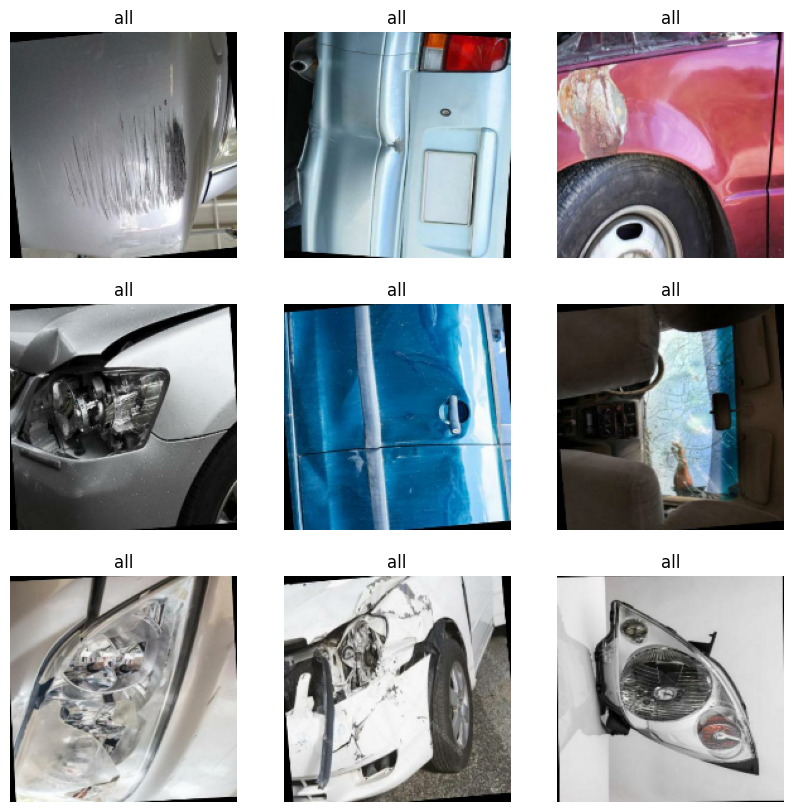

In [44]:
# visualize some examples
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#### * `Dataset.cache` keeps the images in memory after they are loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model.
#### * `Dataset.prefetch` overlaps data preprocessing and model execution while training.

In [45]:
# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [46]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

c:\Users\Alexandre\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


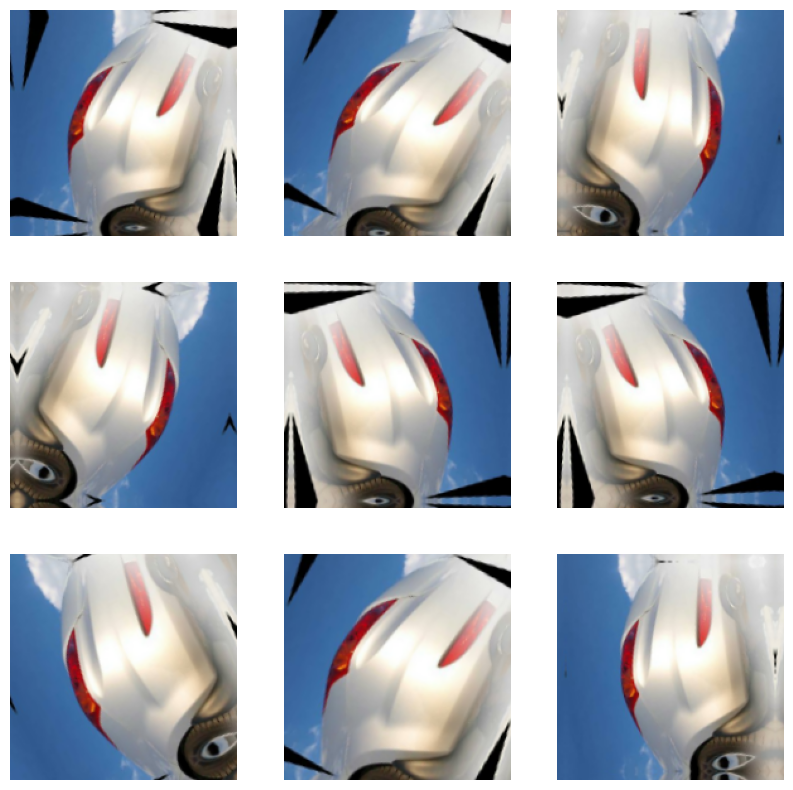

In [47]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [48]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation, # layer of data augmentation
  layers.Rescaling(1./255), # standardize data
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2), # dropout layer
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,988,769 (15.22 MB)

 Trainable params: 3,988,769 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

#### Train the model

In [51]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 154ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/15
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s

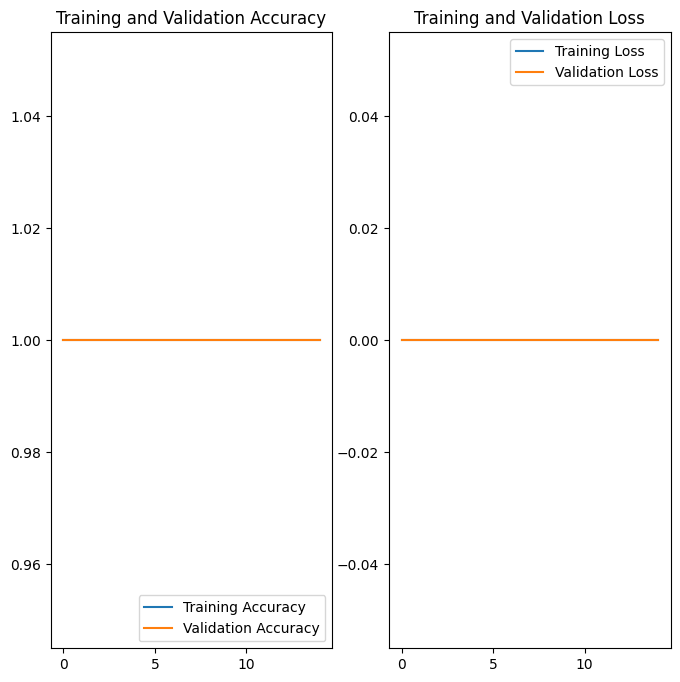

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Testing the model

In [53]:
BMW_url = "https://brightonpanelworks.com.au/wp-content/uploads/2019/10/auto-3734396_1280.jpg"
BMW_path = tf.keras.utils.get_file('grey_BMW', origin=BMW_url)

img = tf.keras.utils.load_img(
    BMW_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

63336/63336 ━━━━━━━━━━━━━━━━━━━━ 1s 9us/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
This image most likely belongs to all with a 100.00 percent confidence.
